<a href="https://colab.research.google.com/github/V-kr0pt/Trabalho_Circuitos_II/blob/master/Senoidal/circuito_senoidal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact


In [ ]:
url = 'https://raw.githubusercontent.com/V-kr0pt/Trabalho_Circuitos_II/master/Senoidal/circuito_senoidal.csv'

circuito = pd.read_csv(url, sep=',')

#transformando o ramo em índice
circuito.set_index('Ramo', drop=True, inplace=True)
circuito

,nó saída,nó chegada,R(Ohm),Xl(Ohm),Xc(Ohm),Vind(V),Fase_Vind,Iind(A),Fase_Iind
Ramo,,,,,,,,,
1,1,3,3,0,0,0,0,1,40
2,2,1,0,0,2,0,0,0,0
3,2,3,0,4,0,0,0,0,0
4,2,3,6,0,0,12,0,0,0


## Matriz Incidência (A)

Sabemos que a matriz tem dimensões nxb, aonde n representa a quantidade de nós e b a quantidade de ramos (branchs) 

In [ ]:
# - Quantos nós e quantos ramos existem no circuito?

#criando um dataframe que possui somente os nós
nos = circuito[['nó saída', 'nó chegada']]

#sabemos que a quantidade de nós vai ser dada pelo máximo número encontrado na tabela "nos"
quantidade_de_nos = nos.values.max()

#a quantidade de ramos é dada pela quantidade de linhas que possuimos na tabela.
quantidade_de_ramos = circuito.shape[0] 

#a matriz de incidencia completa terá dimensões quantidade_de_nos x quantidade_de_ramos
incidencia_completa = np.zeros((quantidade_de_nos, quantidade_de_ramos)) #matriz de zeros


Ainda sabemos que como os nossos ramos são grafos orientados, a matriz de incidência terá em uma coluna somente 2 linhas com valores diferente de 0, uma com valor 1 (linha referente ao nó de saída) e outra com valor -1 (linha referente ao nó de chegada)

In [ ]:
#Além disso terá 1 quando a corrente tiver saindo do nó e -1 quando estiver chegando
for ramo in range(quantidade_de_ramos): 
    #contando o nó a partir do zero
    no_de_saida = nos['nó saída'][ramo+1] - 1 # -1 dado que arrays indexa a partir do 0
    no_de_chegada =  nos['nó chegada'][ramo+1] - 1 

    #a matriz tem 1 na linha do nó de saida, coluna do ramo 
    incidencia_completa[no_de_saida,ramo] = 1
#a matriz tem -1 na linha do nó de chegada, coluna do ramo
    incidencia_completa[no_de_chegada, ramo] = -1

incidencia_completa

array([[ 1., -1.,  0.,  0.],
       [ 0.,  1.,  1.,  1.],
       [-1.,  0., -1., -1.]])

Porém, sabemos que a matriz de incidência é linearmente dependente, então não precisamos usar todas as linhas da matriz, podemos alcançar todos os resultados desejados com a matriz de incidência reduzida (retirando a última linha)

In [ ]:
# "A" será a matriz de incidência reduzida. Iremos retirar a última linha da incidencia_completa
A = incidencia_completa[:-1,:]
A

array([[ 1., -1.,  0.,  0.],
       [ 0.,  1.,  1.,  1.]])

In [ ]:
#a transpota da matriz de incidência reduzida:
A.T

array([[ 1.,  0.],
       [-1.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

## Matriz admitância (Yb)

#### Para calcular a matriz de admitância vamos realizar os seguintes passos:
1. Montar uma tabela com as reatâncias resultantes de cada ramo 
2. Aplicar a função inversa e obter as admitâncias resultantes de cada ramo
3. Montar a matriz diagonal "Yb" a partir da tabela construída

In [ ]:
#Temos que a reatância de cada ramo pode ser calculada da seguinte forma:
R = circuito['R(Ohm)']
Xc = circuito['Xc(Ohm)']
Xl = circuito['Xl(Ohm)']
Zeq = R + 1j*(Xc - Xl)

Zeq

Ramo
1    3.000000+0.000000j
2    0.000000+2.000000j
3    0.000000-4.000000j
4    6.000000+0.000000j
dtype: complex128

In [ ]:
#Então a admitância:
Yeq = 1/Zeq
Yeq

Ramo
1    0.333333+0.000000j
2    0.000000-0.500000j
3   -0.000000+0.250000j
4    0.166667+0.000000j
dtype: complex128

In [ ]:
Yb = np.diag(Yeq)
#apresentando de forma mais legível
print(Yb, sep='\n')

[[ 0.33333333+0.j    0.        +0.j    0.        +0.j    0.        +0.j  ]
 [ 0.        +0.j    0.        -0.5j   0.        +0.j    0.        +0.j  ]
 [ 0.        +0.j    0.        +0.j   -0.        +0.25j  0.        +0.j  ]
 [ 0.        +0.j    0.        +0.j    0.        +0.j    0.16666667+0.j  ]]


## Matriz admitância de nós (Yn)

In [ ]:
# A matriz admitância de nós é dada pela seguinte expressão:
# Yn = A*Yb*A.T
Yn = np.dot(A.dot(Yb),A.T)
Yn

array([[0.33333333-0.5j , 0.        +0.5j ],
       [0.        +0.5j , 0.16666667-0.25j]])

## Fontes Independentes  

### Fontes Independentes de Tensão

In [ ]:
#O usuário irá fornecer o fasor das fontes, 
#então iremos primeiro criar uma tabela com a representação cartesiana

#Para fonte de tensão:
modulo_V = circuito['Vind(V)']
fase_V = circuito['Fase_Vind']
Vs = modulo_V*(np.cos(fase_V) + 1j*np.sin(fase_V))
Vs

Ramo
1     0.000000+0.000000j
2     0.000000+0.000000j
3     0.000000+0.000000j
4    12.000000+0.000000j
dtype: complex128

### Fontes Independentes de Corrente

In [ ]:
#Para fonte de corrente:
modulo_I = circuito['Iind(A)']
fase_I = circuito['Fase_Iind']
Js = modulo_I*(np.cos(fase_I) + 1j*np.sin(fase_I))
Js

Ramo
1   -0.666938+0.745113j
2    0.000000+0.000000j
3    0.000000+0.000000j
4    0.000000+0.000000j
dtype: complex128

### Cálculo de Is

In [ ]:
# A matriz Is é dada pela seguinte expressão:
# Yn = A*Yb*Vs - A*Js
Is = np.dot(A.dot(Yb), Vs) - np.dot(A, Js)
Is

array([0.66693806-0.74511316j, 2.        +0.j        ])

### Cálculo da tensão de nó

In [ ]:
# E = Yn^-1 * Is
Yn_inv = np.linalg.inv(Yn)  
E = Yn_inv.dot(Is)
E 

array([3.33878842-4.06775246j, 4.56039707-3.17576964j])

### Cálculo de tensão de ramo

In [ ]:
# V = A^T * E
V = np.dot(A.T, E)
V  

array([3.33878842-4.06775246j, 1.22160866+0.89198282j,
       4.56039707-3.17576964j, 4.56039707-3.17576964j])

### Cálculo de corrente de ramo

In [ ]:
# J = Js + Yb * V - Yb * Vs
J = Js.values + np.dot(Yb,V) - np.dot(Yb, Vs)
J

array([ 0.44599141-0.61080433j,  0.44599141-0.61080433j,
        0.79394241+1.14009927j, -1.23993382-0.52929494j])

## Tabela de Saída

In [ ]:
df_saida = pd.DataFrame(columns=["Tensão de Ramo (V)", "Corrente de Ramo (A)"])

df_saida

,Tensão de Ramo (V),Corrente de Ramo (A)


In [ ]:
df_saida_no = pd.DataFrame(columns=['Tensão de Nó (V)'])
df_saida_no['Tensão de Nó (V)'] = E
df_saida_no

,Tensão de Nó (V)
0,3.338788-4.067752j
1,4.560397-3.175770j


In [ ]:
df_saida['Tensão de Ramo (V)'] = V
df_saida['Corrente de Ramo (A)'] = J
df_saida['Tensão de Nó (V)'] = df_saida_no
df_saida.set_index([circuito.index], inplace=True)

df_saida

,Tensão de Ramo (V),Corrente de Ramo (A),Tensão de Nó (V)
Ramo,,,
1,3.338788-4.067752j,0.445991-0.610804j,3.338788-4.067752j
2,1.221609+0.891983j,0.445991-0.610804j,4.560397-3.175770j
3,4.560397-3.175770j,0.793942+1.140099j,NaN
4,4.560397-3.175770j,-1.239934-0.529295j,NaN


#### Arquivo de saída

In [ ]:
df_saida.to_csv('saida_senoidal.csv')

### Gráfico! 

Gráfico das Tensões nos Ramos:


In [ ]:
tensao_ramo_modulo = np.abs(df_saida['Tensão de Ramo (V)'].values)
tensao_ramo_fase = np.angle(df_saida['Tensão de Ramo (V)'].values)
t = np.linspace(0,10,1000)
# w precisa ser definido previamente
w = 1

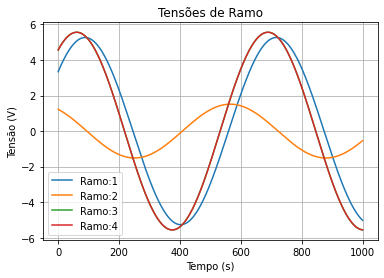

In [ ]:
for ramo in range(quantidade_de_ramos):
  tensao_ramo = tensao_ramo_modulo[ramo] * np.cos(w*t + tensao_ramo_fase[ramo])
  plt.plot(tensao_ramo, label = f'Ramo:{ramo+1}')

plt.title ('Tensões de Ramo')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.grid(True)


Gráfico das Tensões


In [ ]:
corrente_ramo_modulo = np.abs(df_saida['Corrente de Ramo (A)'].values)
corrente_ramo_fase = np.angle(df_saida['Corrente de Ramo (A)'].values)

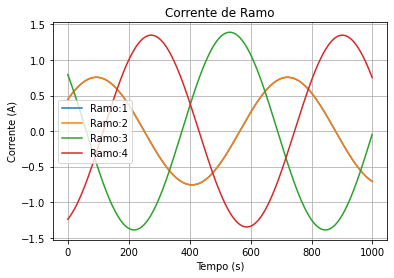

In [ ]:
for ramo in range(quantidade_de_ramos):
  corrente_ramo = corrente_ramo_modulo[ramo] * np.cos(w*t + corrente_ramo_fase[ramo])
  plt.plot(corrente_ramo, label = f'Ramo:{ramo+1}')

plt.title ('Corrente de Ramo')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Corrente (A)')
plt.grid(True)

In [ ]:
tensao_no_modulo = np.abs(df_saida['Tensão de Nó (V)'].values)
tensao_no_fase = np.angle(df_saida['Tensão de Nó (V)'].values)

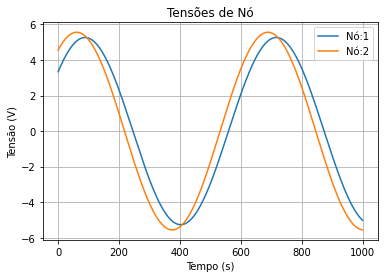

In [ ]:
for nos in range(quantidade_de_nos-1):
   tensao_no = tensao_no_modulo[nos] * np.cos(w*t + tensao_no_fase[nos])
   plt.plot( tensao_no, label = f'Nó:{nos+1}')

plt.title ('Tensões de Nó')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.grid(True)